In [61]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
from keras import models
import matplotlib.pyplot as plt
import os


In [2]:
imag_path = 'D://Deep-Learning-U//DL Colab Changes//Convolutional_Neural_Networks 3//dataset//single_prediction//cat_or_dog_1.jpg'

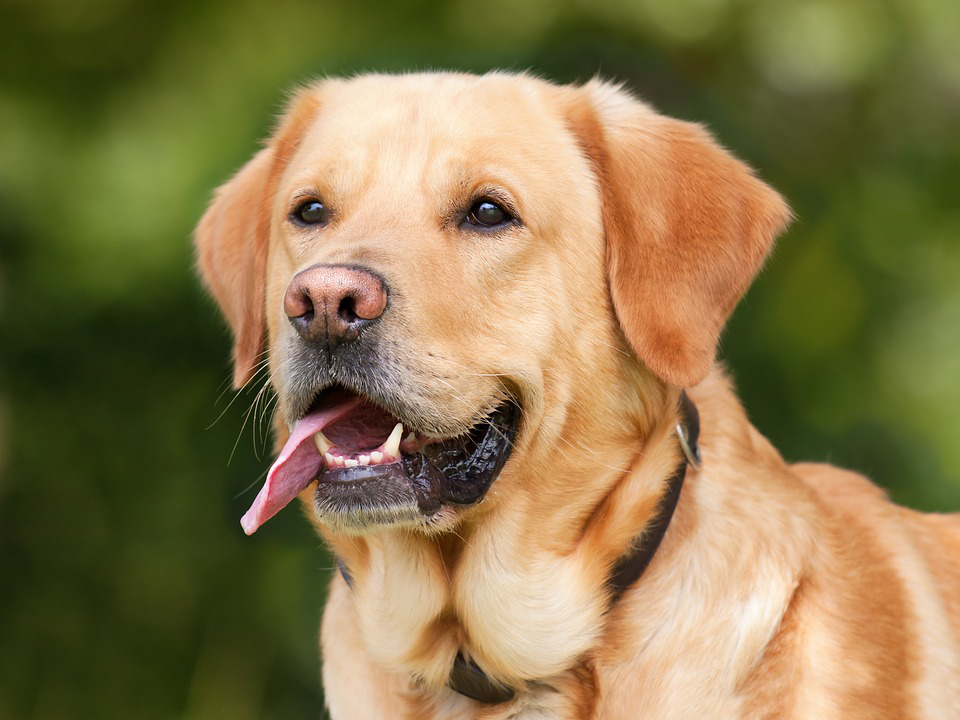

In [13]:
image_file = Image.open(fp = imag_path, )
image_file

In [14]:
image_arr = np.array(image_file)

In [10]:
image_arr.shape

(720, 960, 3)

## Load the model

In [24]:
loaded_model = load_model('C://Users//Sunny//Work on python//GitHub//DeepLearning//DeepLearning//Kears//Cats_&_Dogs_small_1.h5')

In [25]:
## Summary of loaded model
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)      

In [26]:
layers_output = [layer.output for layer in loaded_model.layers[:8]]

In [27]:
layers_output

[<tf.Tensor 'conv2d_1_1/Relu:0' shape=(None, 254, 254, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1_1/MaxPool:0' shape=(None, 127, 127, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2_1/Relu:0' shape=(None, 125, 125, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2_1/MaxPool:0' shape=(None, 62, 62, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3_1/Relu:0' shape=(None, 60, 60, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3_1/MaxPool:0' shape=(None, 30, 30, 128) dtype=float32>,
 <tf.Tensor 'conv2d_4_1/Relu:0' shape=(None, 28, 28, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4_1/MaxPool:0' shape=(None, 14, 14, 128) dtype=float32>]

In [39]:
## Check the Input of the Model 
print(model.input)                   # i.e. Input image must have the size of 256*256*3

## Resize the image 
imag = image.load_img(path=imag_path, target_size=(256,256))
imag_arr = image.img_to_array(imag)
imag_tensor = np.expand_dims(imag_arr, axis=0)
imag_tensor.shape

Tensor("conv2d_1_input:0", shape=(None, 256, 256, 3), dtype=float32)


(1, 256, 256, 3)

In [34]:
activation_model = models.Model(inputs = loaded_model.input, outputs = layers_output)

In [44]:
activations = activation_model.predict(x=imag_tensor)
len(activations)           

8

len of activations is equal to the length of layers_output 

In [46]:
activations[0].shape

(1, 254, 254, 32)

In [47]:
first_activation_layer = activations[0]

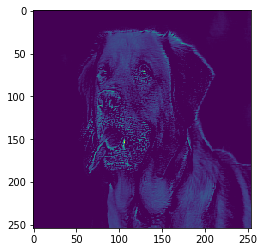

In [56]:
## plot the fifth channel of first activation layer
plt.imshow(first_activation_layer[0,:,:,5])     

In [51]:
## let's plot the whole channel of each activation layer

In [53]:
layers_name = [layer.name for layer in loaded_model.layers[:8]]
layers_name

['conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

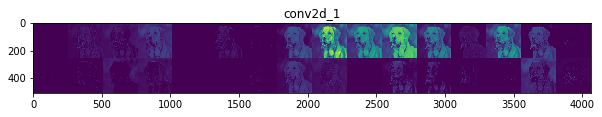

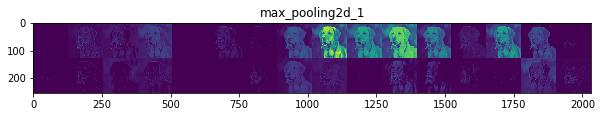

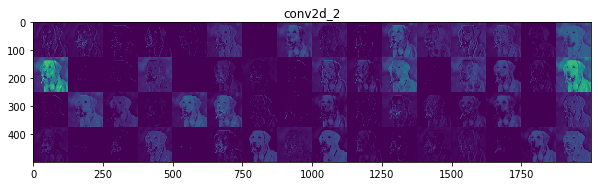

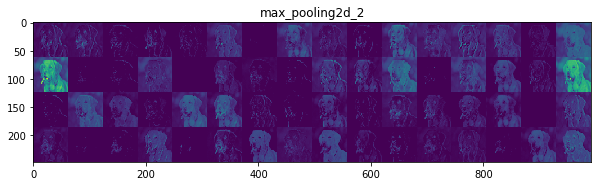

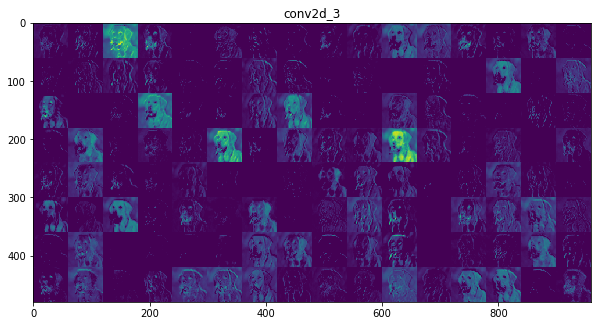

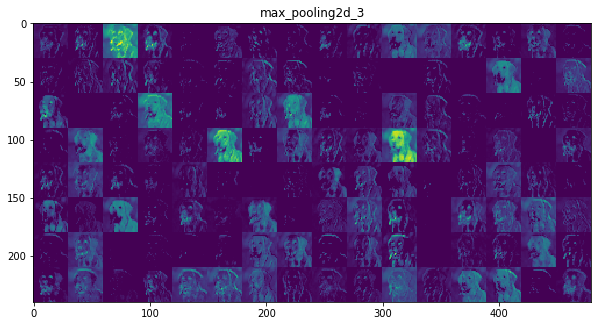

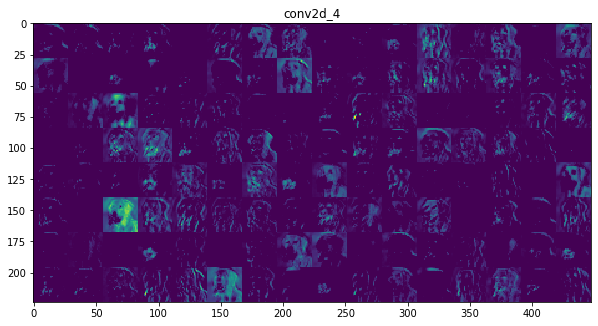

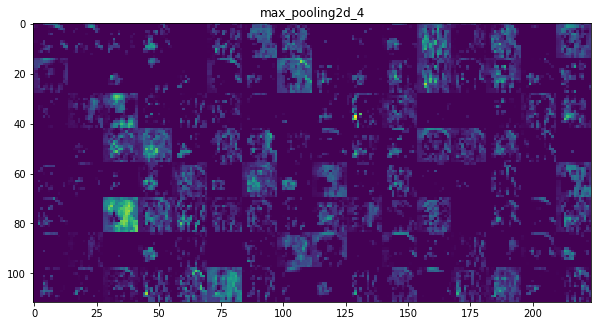

In [65]:
imag_in_row = 16

for layer_name, activation in zip(layers_name, activations):
    feature = activation.shape[-1]
    n_rows = feature // imag_in_row
    size = activation.shape[1]
    
    display_grid = np.zeros(shape= (n_rows*size, imag_in_row*size))
    
    for row in range(n_rows):
        for channel in range(imag_in_row):
            channel_imag = activation[0, :, :, (row*imag_in_row)+channel]
            display_grid[row*size : (row+1)*size, 
                        channel*size : (channel+1)*size]  = channel_imag
            
    plt.figure(figsize=(10,n_rows))       
    plt.title(layer_name)
    plt.imshow(display_grid)